In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
import os
import glob
import tensorflow as tf
import numpy as np
from keras import layers, models, optimizers, losses, metrics, regularizers
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.preprocessing.sequence import pad_sequences
import keras.backend as K 
from keras.engine.topology import Container


/home/duke/.conda/envs/heads/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 12) # set default size of plots

In [4]:
from tensorflow.python import debug as tf_debug

sess = K.get_session()
sess.as_default()

In [5]:
from keras_contrib.layers.normalization import InstanceNormalization

In [6]:
from keras.datasets import mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

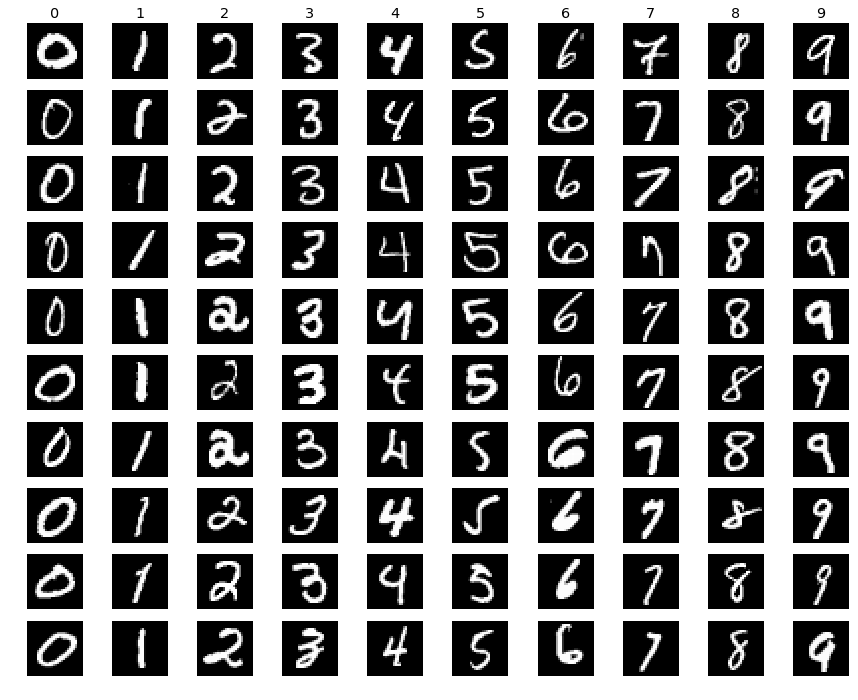

In [9]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [10]:
def build_encoder():
    img_input = layers.Input(shape=(28, 28, 1))

    output = None
    return models.Model(img_input, output, 
                        name='encoder')

In [11]:
def build_decoder():
    emb_input = layers.Input(shape=(128,))
    
    output = None
    return models.Model(emb_input, output, 
                        name='decoder')

In [12]:
def build_autoencoder():
    img_input = layers.Input(shape=(28, 28, 1))
    encoder = build_encoder()
    decoder = build_decoder()
    
    embedding = encoder(img_input)
    reconstructed_input = decoder(embedding)
    
    return models.Model(img_input, reconstructed_input, 
                        name='autoencoder')

In [13]:
K.clear_session()
model = build_autoencoder()

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 128)               394560    
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         138417    
Total params: 532,977
Trainable params: 532,977
Non-trainable params: 0
_________________________________________________________________


Тренировочный цикл

In [15]:
model.compile('adam', 'mae')

In [16]:
x_train = np.expand_dims(x_train, -1)

In [36]:
model.fit(x=x_train, callbacks= [ReduceLROnPlateau(patience=4, monitor='loss', epsilon=1)],
          y=x_train, 
          batch_size=128, 
          epochs=30)

Epoch 1/30
60000/60000 [==============================] - 10s 166us/step - loss: 5.0045
Epoch 2/30
60000/60000 [==============================] - 10s 167us/step - loss: 4.9930
Epoch 3/30
60000/60000 [==============================] - 10s 167us/step - loss: 4.9489
Epoch 4/30
60000/60000 [==============================] - 10s 171us/step - loss: 4.9109
Epoch 5/30
60000/60000 [==============================] - 12s 200us/step - loss: 4.8913
Epoch 6/30
60000/60000 [==============================] - 11s 189us/step - loss: 4.8453
Epoch 7/30
60000/60000 [==============================] - 10s 164us/step - loss: 4.5290
Epoch 8/30
60000/60000 [==============================] - 10s 165us/step - loss: 4.5050
Epoch 9/30
60000/60000 [==============================] - 11s 177us/step - loss: 4.4961
Epoch 10/30
60000/60000 [==============================] - 10s 171us/step - loss: 4.4908
Epoch 11/30
60000/60000 [==============================] - 11s 176us/step - loss: 4.4523
Epoch 12/30
60000/60000 [=====

KeyboardInterrupt: 

In [37]:
output = model.predict(np.expand_dims(x_test, -1), batch_size=128)

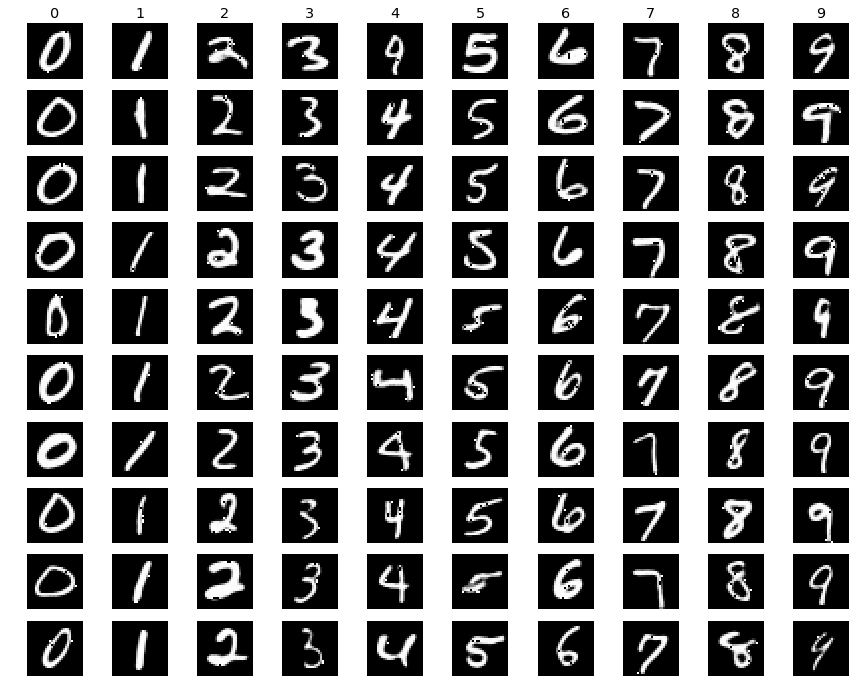

In [39]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_test == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(np.squeeze(output[idx]).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()